In [8]:
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_format = 'retina'
from gwpy.timeseries import TimeSeries

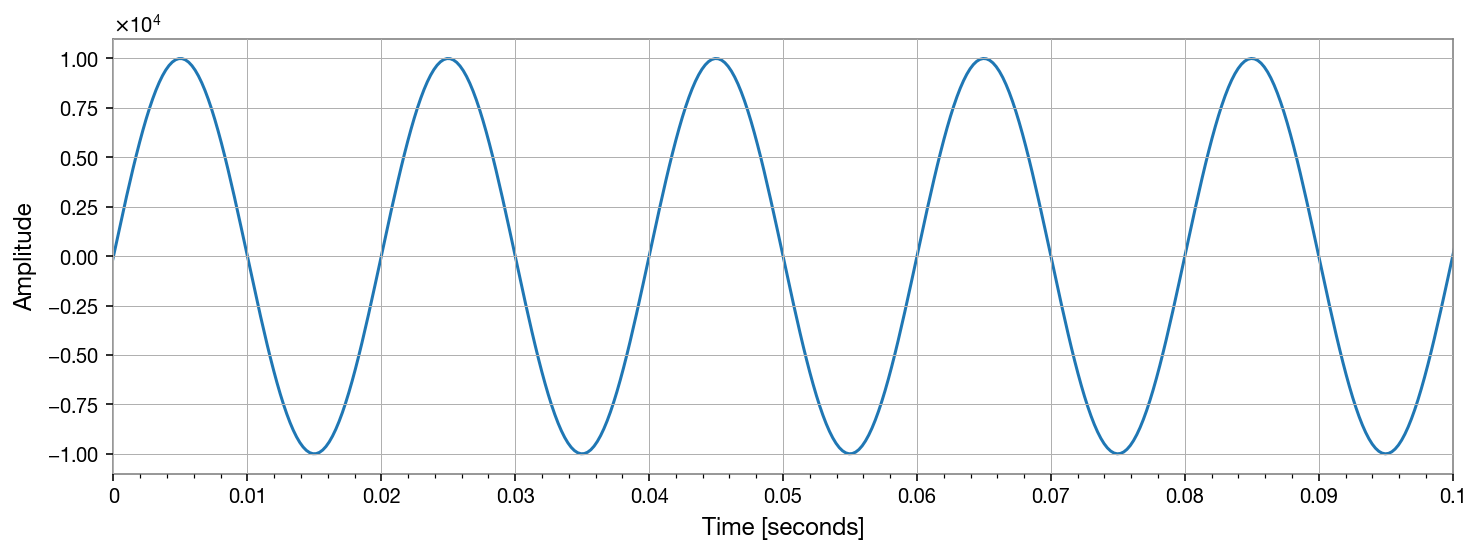

In [9]:
x = np.arange(0,16,1.0/4096)

freq = 50

y = 10000*np.sin(2*np.pi*freq*x)
hightone = TimeSeries(y, sample_rate=4096).taper(duration=6)
#plt.plot(x,hightone, c='blue')
hightone.plot()
plt.xlim(6,6.1)
plt.xlabel('Time [seconds]')
plt.ylabel('Amplitude')

noise = TimeSeries(np.random.normal(scale=1, size=180*4096), sample_rate=4096).taper()
noise.t0 = -30

data = noise.inject(hightone)
#data.plot()

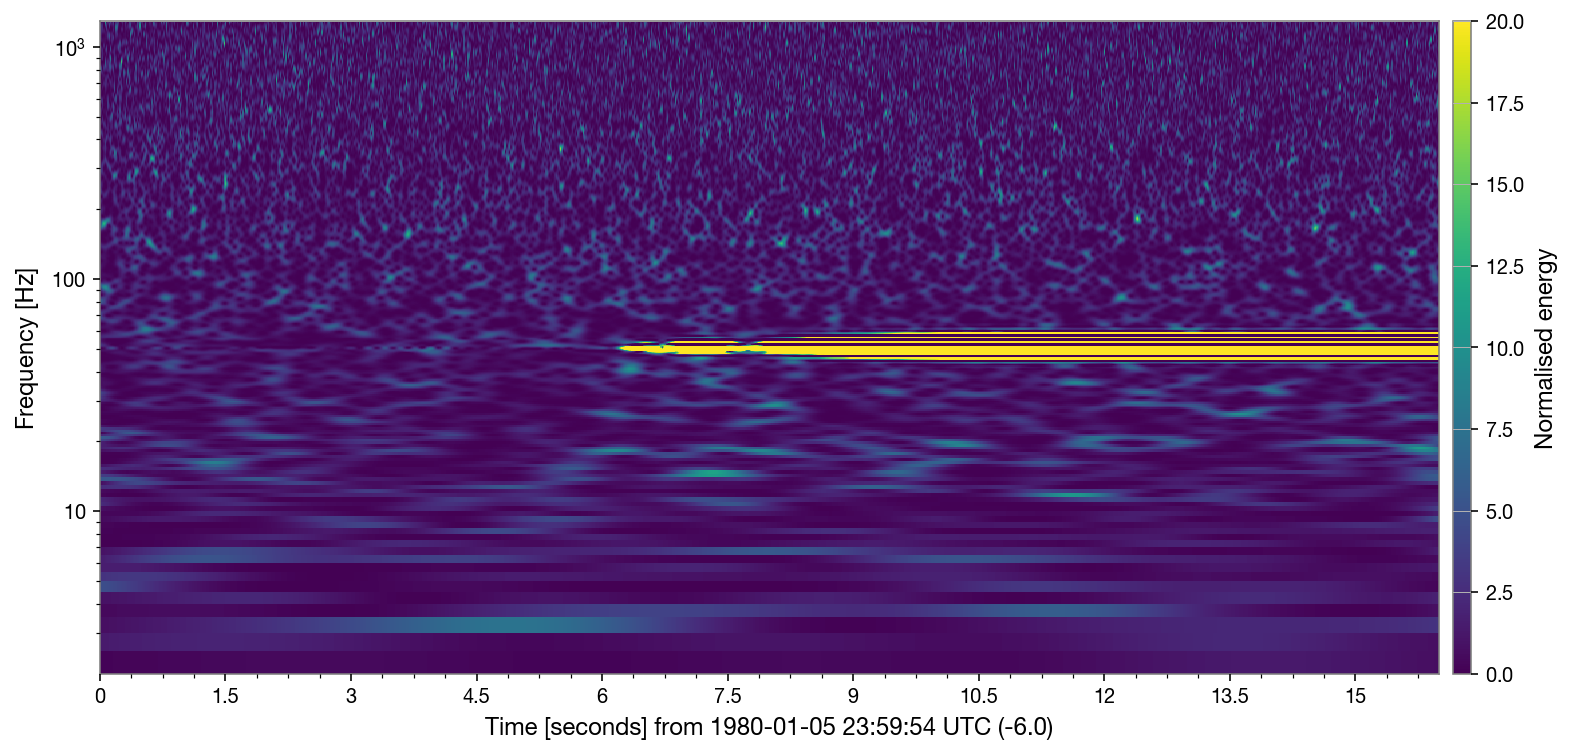

In [10]:
t0=2
dt = 8  #-- Set width of q-transform plot, in seconds
hq = data.q_transform(outseg=(t0-dt, t0+dt))
fig4 = hq.plot()
ax = fig4.gca()
fig4.colorbar(label="Normalised energy", vmin=0,vmax=20)
ax.grid(False)
ax.set_yscale('log')

(0.0, 20.0)

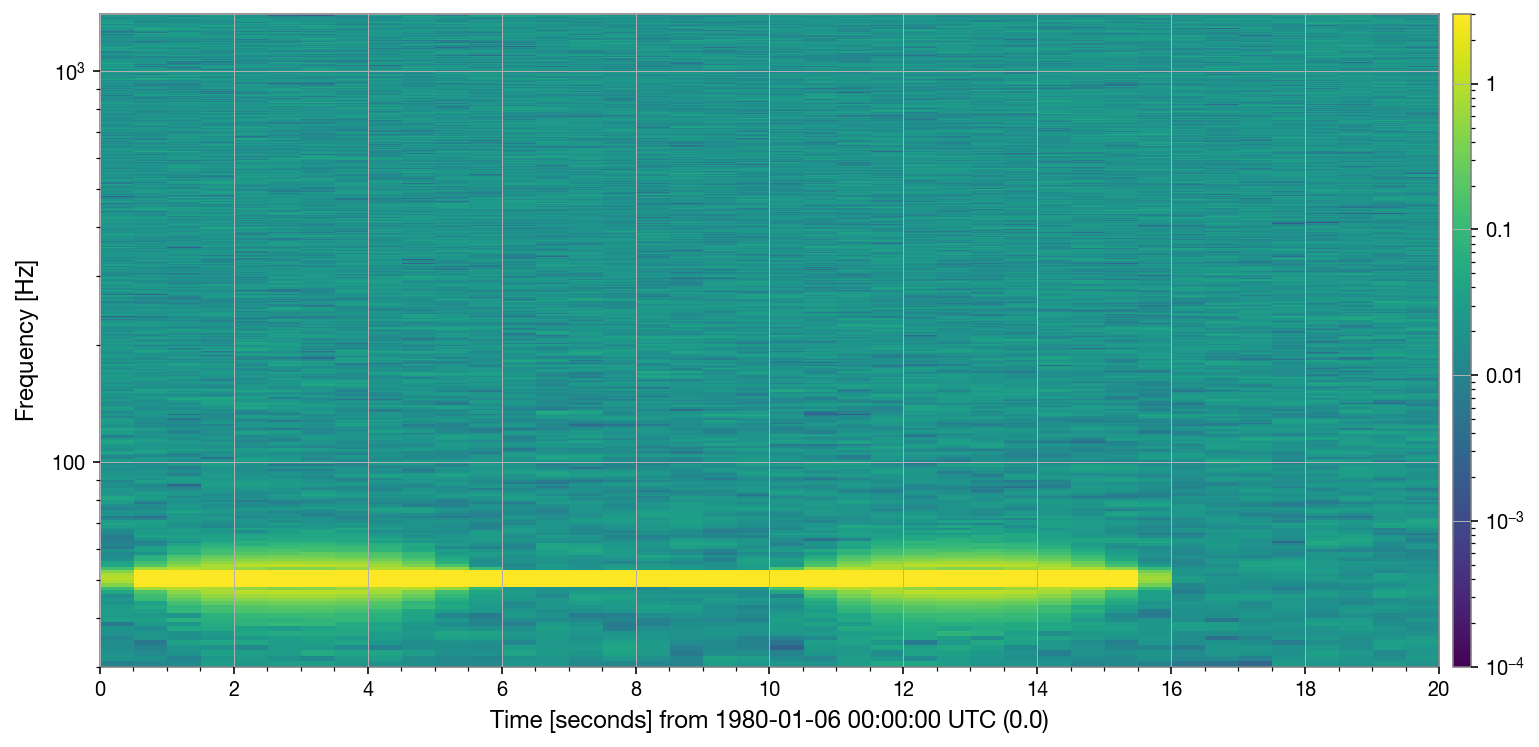

In [11]:
specgram = data.spectrogram2(fftlength=1, overlap=0.5, window='blackman') ** (1/2.)
plot = specgram.plot()

ax = plot.gca()
ax.set_yscale('log')
ax.set_ylim(30, 1400)
ax.colorbar(
    clim=(0.0001, 3),
    norm="log",
    #label=r"Strain noise [$1/\sqrt{\mathrm{Hz}}$]",
)
plt.xlim(0,20)
#plot  # refresh

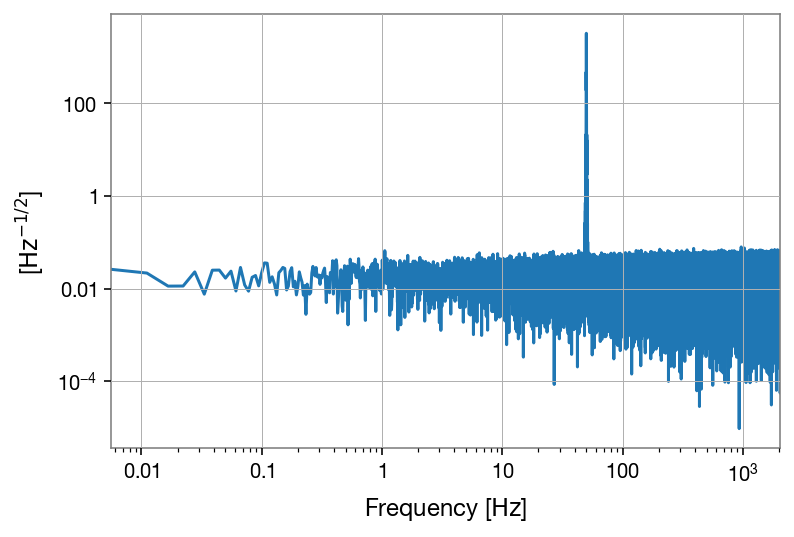

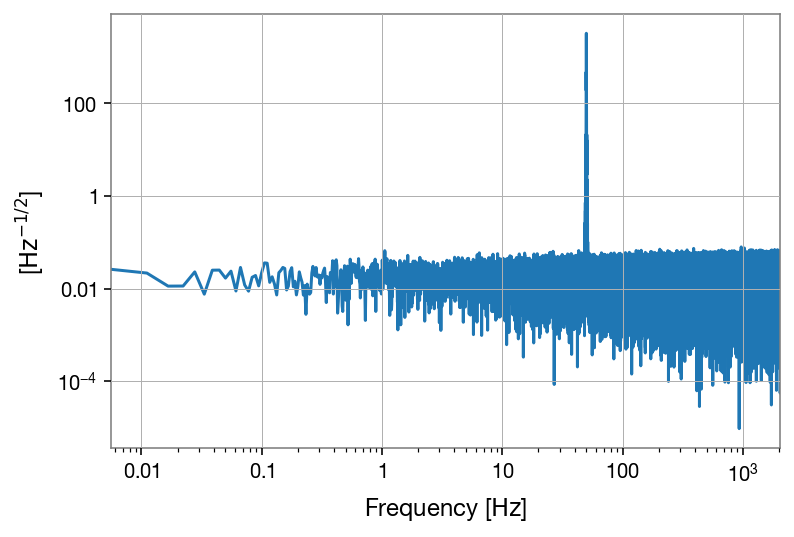

In [12]:
data.asd().plot()

In [13]:
# -- Make spectrogram


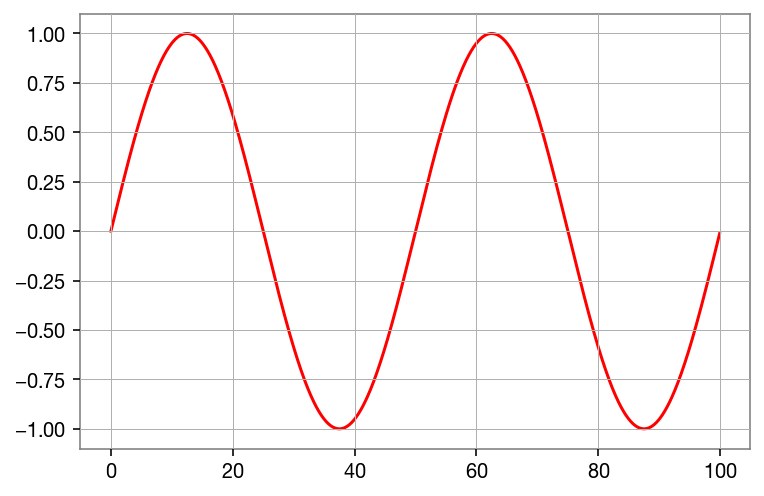

In [14]:
x = np.arange(0,100,0.1)
freq = 0.02
y = np.sin(2*np.pi*freq*x)
plt.plot(x,y, c='red')

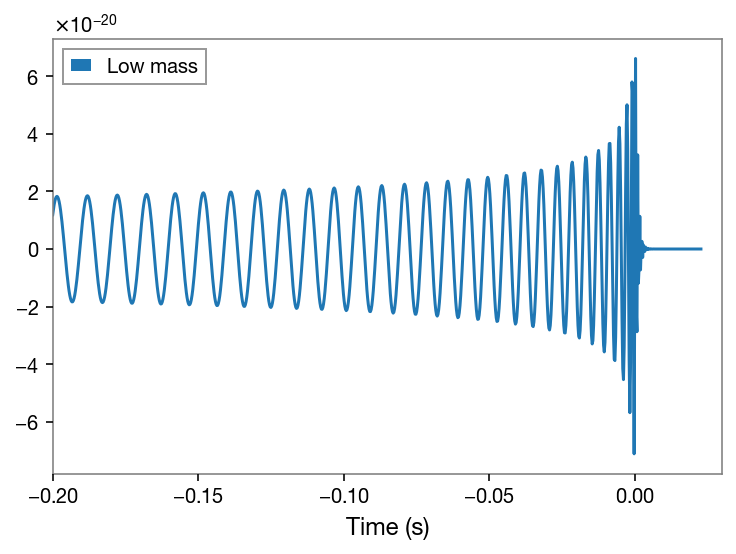

In [15]:
# -- Make q-scans of signals

from pycbc.waveform import get_td_waveform
import pylab

hp_high, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=6,
                         mass2=6,
                         delta_t=1.0/4096,
                         f_lower=30,
                              distance=2,
                         )

pylab.plot(hp_high.sample_times, hp_high, label='Low mass')
pylab.xlabel('Time (s)')
pylab.xlim(-.2, .03)
pylab.legend()
pylab.grid()
pylab.show()



In [16]:
#print(dir(hp))


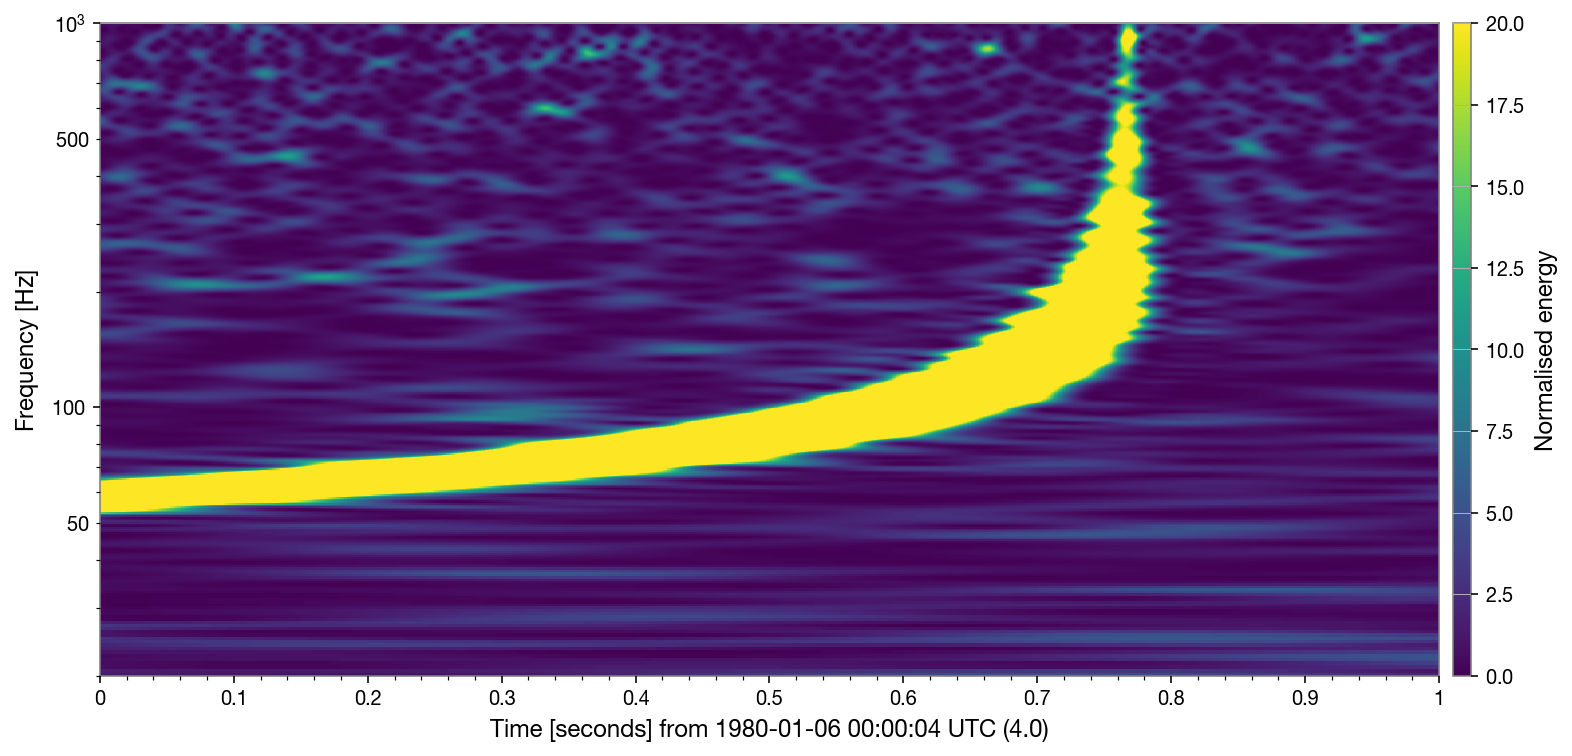

<Figure size 432x288 with 0 Axes>

In [17]:
data_sim = TimeSeries(hp_high, sample_rate=4096).taper()

noise = TimeSeries(np.random.normal(scale=1e-20, size=32*4096), sample_rate=4096).taper()
noise.t0 = -16

good_data = noise.inject(data_sim)
good_data.plot()
plt.figure()

t0=4.5
dt = 0.5  #-- Set width of q-transform plot, in seconds
hq = good_data.q_transform(outseg=(t0-dt, t0+dt))
fig4 = hq.plot()
ax = fig4.gca()
fig4.colorbar(label="Normalised energy", vmin=0,vmax=20)
plt.ylim(20,1000)
#fig4.colorbar(label="Normalised energy")
ax.grid(False)
ax.set_yscale('log')

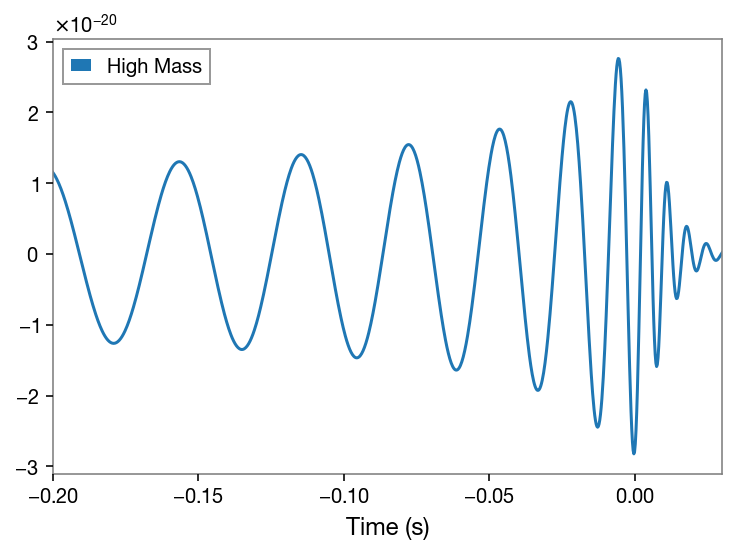

In [18]:
# -- high mass

hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=60,
                         mass2=60,
                         delta_t=1.0/4096,
                         distance=50,
                         f_lower=10,
                         )

pylab.plot(hp.sample_times, hp, label='High Mass')
pylab.xlabel('Time (s)')
pylab.xlim(-.2, .03)
pylab.legend()
pylab.grid()
pylab.show()

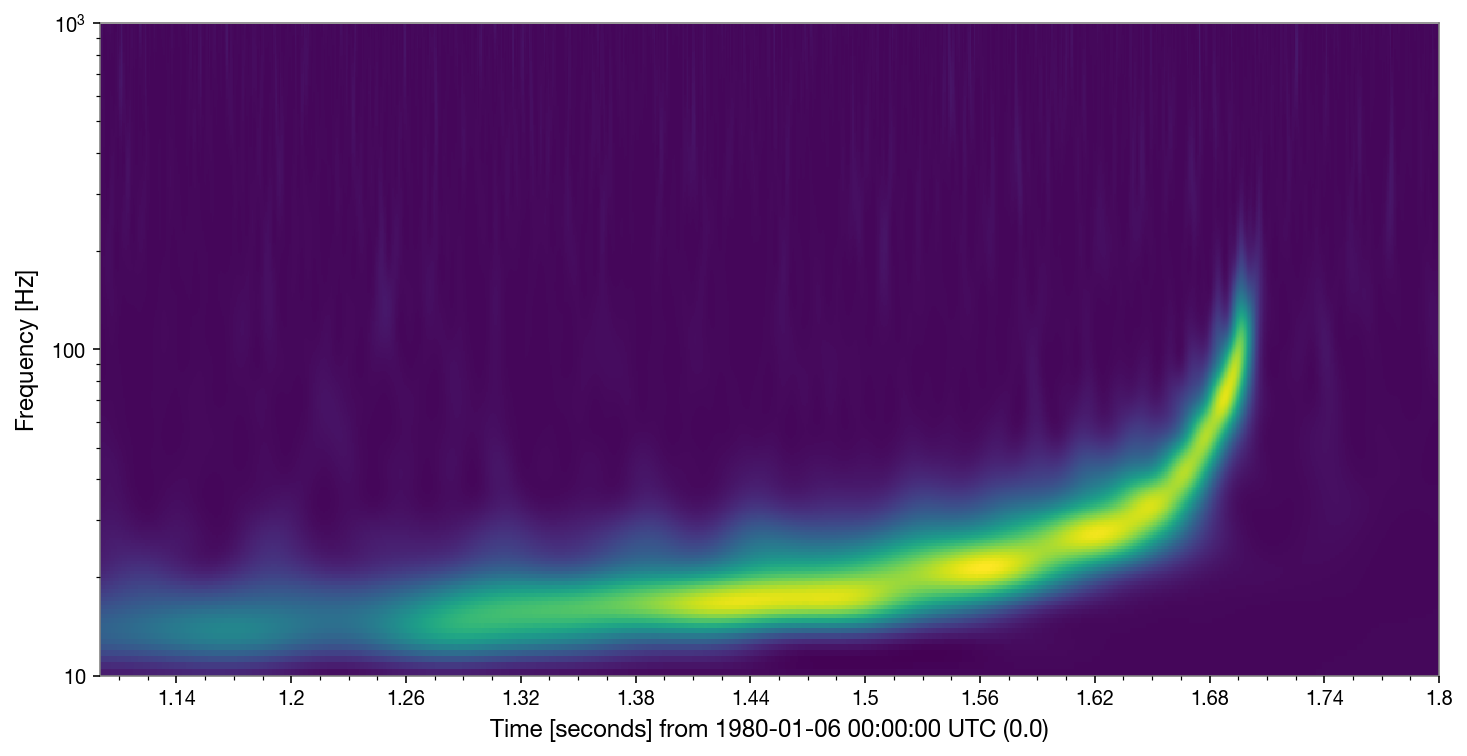

In [40]:
sim_low = TimeSeries(hp, sample_rate=4096).taper()
data_low = noise.inject(sim_low)



t0=1.5
dt = 0.5  #-- Set width of q-transform plot, in seconds
hq = data_low.q_transform(outseg=(t0-0.4, t0+0.3),qrange=((3,5)))
fig4 = hq.plot()
ax = fig4.gca()
#fig4.colorbar(label="Normalised energy", vmin=0,vmax=200)
plt.ylim(10,1000)
#fig4.colorbar(label="Normalised energy")
ax.grid(False)
ax.set_yscale('log')

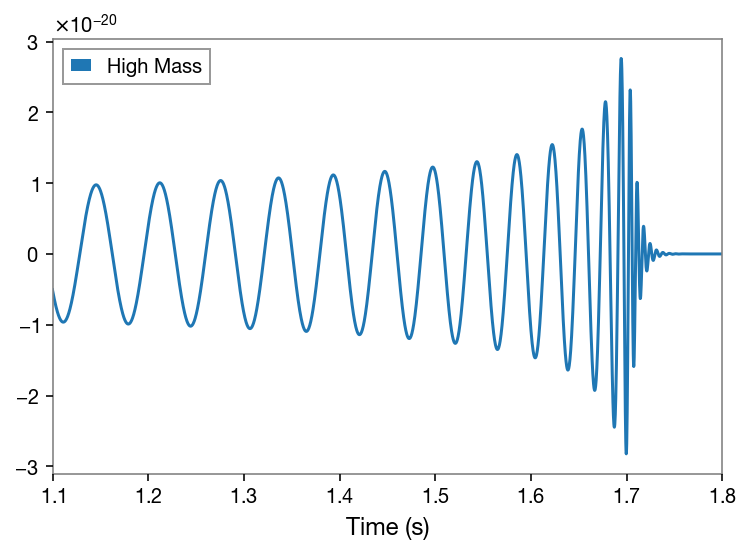

In [39]:


pylab.plot(hp.sample_times+1.7, hp, label='High Mass')
pylab.xlabel('Time (s)')
pylab.xlim(1.1, 1.8)
pylab.legend()
pylab.grid()
pylab.show()
